# Homework 3

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [1]:
# Necesary imports
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt

# Imports for extra credit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

# Inline plotting
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [2]:
def sigmoid(x):
    """Calculates the sigmoid of a value or vecctor
            @param x: the number or vector to transform
        @return the sigmoid transformation of the input"""
    return 1.0 / (1.0 + np.exp(-x))

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [3]:
def model(x, w):
    """Models inputs and weights as a linear combination
            @param x: a vector or array of input features
            @param w: an array of weights"""
    # The linear regression
    return (np.dot(x.T, w[1:]) + w[0]).T

def cross_entropy(w, x, y, eps=1e-7):
    """Calculates the cross entropy cost
            @param w: an array of weights
            @param x: an array of features
            @param y: an array of predicted values
        @return the cross entropy loss"""
    return  -(1.0/float(y.size)) * (np.sum(y * np.log(sigmoid(model(x, w))) + (1 - y) * \
                                           np.log((1 - sigmoid(model(x, w)) + eps))))

Q3) [2 points] Run the code below to read a data file. Plot a scatter plot of x vs y.

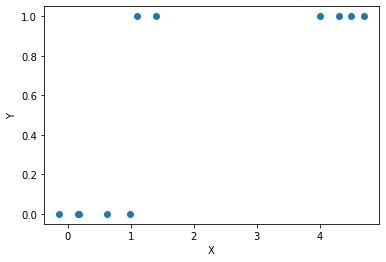

In [4]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname, delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

# Plot the data
plt.scatter(x, y)

# Add labels
plt.xlabel("X")
plt.ylabel("Y")

# Show the plot
plt.show()

Q4) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [5]:
def gradient_descent(g, alpha, max_its, w, x, y):
    """Finds optimal weights by using gradient descent
            @param g: a cost function to optimize
            @param alpha: the learning rate
            @param max_its: the maximum number of iteratiions to run gradient descent
            @param w: a numpy array of starting weights
            @param y: actual values
        @returns numpy arrays of the weight and cost histories"""
    
    # Weights to be updated
    wk = w
    
    # Calculates the gradient for the above function given any w
    gradient = grad(g)
    
    # Will hold the costs and weights after each iteration
    cost_history = [g(w, x, y)]
    weight_history = [wk]
    
    # Claculates weights by moving down the gradient
    for iter in range(max_its):
        wk = wk - alpha*gradient(wk, x, y)
        cost_history.append(g(wk, x, y))
        weight_history.append(wk)
        
    return weight_history, cost_history

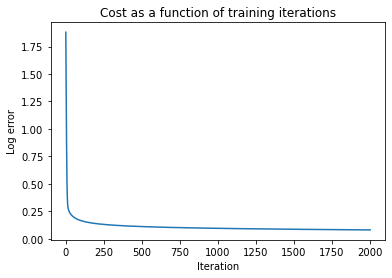

In [6]:
# Run gradient descent
run1_wh, run1_ch = gradient_descent(cross_entropy, 1, 2000, np.array([3.0, 3.0]), x, y)

# Plot the cost history
plt.plot(run1_ch)

# Add informative labels
plt.title("Cost as a function of training iterations")
plt.xlabel("Iteration")
plt.ylabel("Log error")

# Show the plot
plt.show()

Q5) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [7]:
def logistic_regression(learned_w, x):
    """Calculates the probability of the positive class
            @param learned_w: an array of learned weights
            @param x: a vector of features
        @return an array of predicted class probabilities"""
    return sigmoid(model(x, learned_w))

Q6) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q3. 


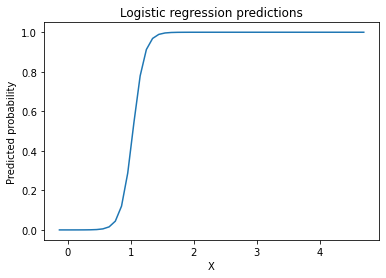

In [8]:
s = np.linspace(np.min(x), np.max(x))

# Predict the classes using the model
p1 = logistic_regression(run1_wh[-1], np.array([s]))

# Plot the curve
plt.plot(s, p1)

# Add informative information
plt.title("Logistic regression predictions")
plt.xlabel("X")
plt.ylabel("Predicted probability")

# Show the plot
plt.show()

Q7) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [9]:
def logistic_regression_modified(learned_w, x, threshold):
    """Calculates the predicted class label using input features and learned weights
            @param learned_w: an array of learned weights
            @param x: an array of features
            @param threshold: a threshold to determine which class a prediction belongs to
        @return an array of predicted class labels"""
    # Get predicted probabilities
    probs = sigmoid(model(x, learned_w))
    
    # Convert them to class labels based on the threshold
    class_label = np.where(probs > threshold, 1, 0)
    
    return class_label

Q8) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [10]:
def evaluate(y_actual, y_pred):
    """Calculates true positives, true negatives, false positives, false negatives, and accuracy
            @param y_actual: actual labels
            @param y_pred: predicted labels
        @return a tuple of the false positives, false negatives, true positives, true negatives, and accuracy"""
    # Calculate positives and negatives
    true_positive = np.sum(np.where((y_pred == 1) & (y_actual == 1)))
    true_negative = np.sum(np.where((y_pred == 0) & (y_actual == 0)))
    false_positive = np.sum(np.where((y_pred == 1) & (y_actual == 0)))
    false_negative = np.sum(np.where((y_pred == 0) & (y_actual == 1)))
            
    # Calculate accuracy
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
        
    return false_positive, false_negative, true_positive, true_negative, accuracy

# Get predicted labels
p2 = logistic_regression_modified(run1_wh[-1], x, 0.5)

# Call the function
evaluate(y, p2)

(0, 0, 45, 10, 1.0)

Q9) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [11]:
def perceptron_cost(w, x, y):   
    """Calculates the perceptron softmax cost
            @param w: an array of weights
            @param x: an array of features
            @param y: an array of labels
        @return the perceptron softmax cost"""
    return np.sum(np.log(1 + np.exp(-y * model(x, w)))) / float(y.size)

Q10) [10 points] Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0. Save the cost and weight history returned by the gradient descent function. Plot the cost history. Which cost seems to do better on this dataset? Why do think that is?

$\color{red}{\text{The cross entropy function had a slightly lower cost, but that is because it is slightly different than the softmax perceptron cost. Even if you could}}$
$\color{red}{\text{compare the two cost functions to each other, the perceptron cost may perform better on a different dataset. The most important thing is that}}$$\color{red}{\text{gradient descent converged with both cost functions}}$

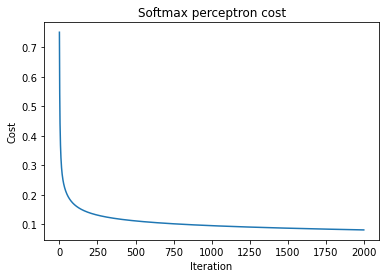

In [12]:
# Convert class labels for a perceptron
y[y==0] = -1

# Run gradient descent
run2_wh, run2_ch = gradient_descent(perceptron_cost, 1, 2000, np.array([1.0, 1.0]).reshape((2, 1)), x, y)

# Instantiate a plot
plt.plot(run2_ch)

# Add informative text
plt.title("Softmax perceptron cost")
plt.xlabel("Iteration")
plt.ylabel("Cost")

# Show the plot
plt.show()

## The rest of these problems are for bonus points

Q11) [2 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [13]:
# Load the data
heart_data = np.loadtxt('heart.csv', delimiter = ',', skiprows=1)

Q12) [2 points] Use the data above to set y to be the "target" and X to be the remaining columns.

In [14]:
# Split the data into features and labels
x = heart_data[:, :-1]
y = heart_data[:, -1]

Q13) [2 points] Run the code below to import the logistic regression and the train_test split functions from sklearn. Split your data into 80% train 20% test.

In [15]:
 # Create train and test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

Q14) [5 points] Use sklearn to fit a logistic regression model on your training set. Use all the default parameter. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [16]:
# Instantiate a logistic regression and fit it to the data
log_reg = LogisticRegression(random_state=17, max_iter=1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=17)

Q15) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [17]:
# Extract predicted classes
predicted_classes = log_reg.predict_proba(x_test)

Q16) [2 points] Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. I.e., you should no longer have tuples.

In [18]:
# Extract predictions for the positive class
pred_pos_class = predicted_classes[:, 1]

Q17) [8 points] Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters). Also, print out the thresholds generated by the roc_curve function.

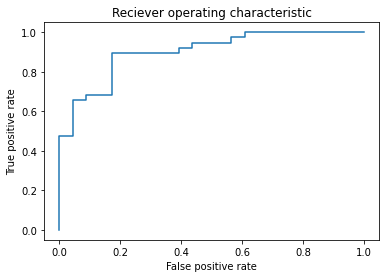

array([1.99292992e+00, 9.92929923e-01, 8.99996642e-01, 8.93741445e-01,
       7.92573843e-01, 7.91373429e-01, 7.76096338e-01, 6.91785094e-01,
       4.10524410e-01, 2.33392055e-01, 2.32385783e-01, 2.21293812e-01,
       8.99510014e-02, 6.01463811e-02, 5.95939813e-02, 4.43987403e-02,
       3.56162059e-02, 1.28491632e-03])

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, pred_pos_class, pos_label=1)

# Generate plot
plt.plot(fpr, tpr)

# Add informative labels
plt.title("Reciever operating characteristic")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")

# Display the plot
plt.show()

# Print out the thresholds
thresholds

Q18) [2 points] Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score using the exact same setup as the last question.

In [20]:
# Calculate the ROC curve using sklearn functions
roc_auc_score(y_test, pred_pos_class)

0.9004576659038902